In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model 

In [9]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


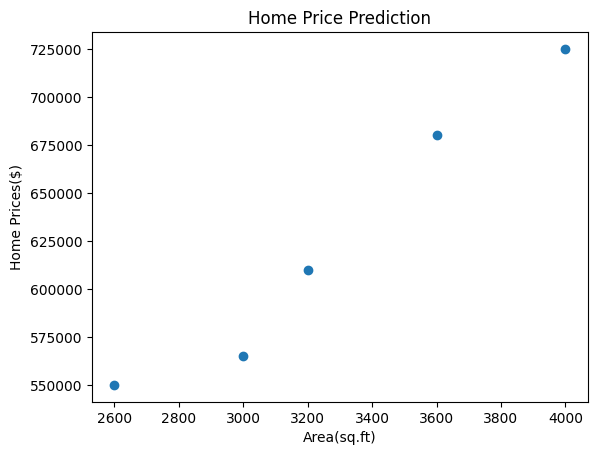

In [33]:
plt.ylabel("Home Prices($)")
plt.xlabel("Area(sq.ft)")
plt.title("Home Price Prediction")
# plt.plot(df.area, df.price, linestyle="", marker=".") -----> Same as the below comand plt.scatter(df.area, df.price)
plt.scatter(df.area, df.price)


In [43]:
# creating a Linear Regression obj 'reg'
reg= linear_model.LinearRegression();
# "fit()" is used to train the model(here its Linear Regression model) with the dataframe
# "fit()" takes 2 arguments, and the 1st argument has to be stored in a 2-D array so we placed the "area" inside a 2-D array [[]].
reg.fit(df[["area"]], df.price) # The 1st argument in the fit() api/func has to be a 2-D array, Therefore we need to place the area(x-axis) in the 2-D array 

LinearRegression()

In [45]:
# 'predict()' is used to make prediction 
reg.predict([[3300]]) # We want to predict the price of the house with area '3300'

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [50]:
reg.coef_

array([135.78767123])

In [51]:
reg.intercept_

180616.43835616432

In [52]:
# We know the formula ---> y= mx+b 
# here, m=slope or coefficient or gradient
# b= interccept
# x = the value we want to predict the price for
# y= the price or the value we want to take out
# Therefore: y(price)= 135.78767123 * 3300 + 180616.43835616432 = 628715.7534151643
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

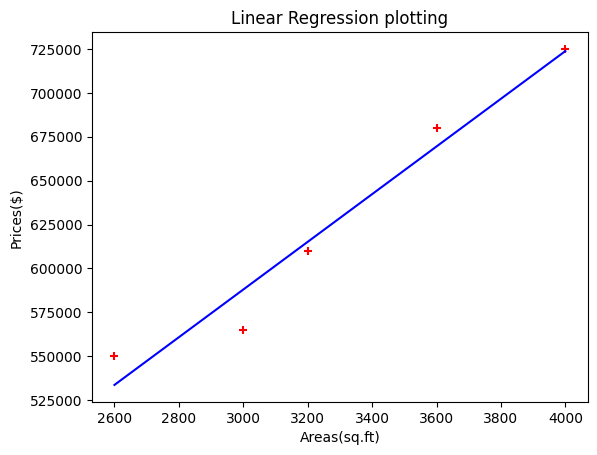

In [79]:
plt.xlabel("Areas(sq.ft)")
plt.ylabel("Prices($)")
plt.title("Linear Regression plotting")
plt.scatter(df.area, df.price, marker="+", color="red")
plt.plot(df.area, reg.predict(df[["area"]]), color="blue")

In [73]:
# We want to predict the prices of these areas (provided in the areas.csv file)
df2= pd.read_csv("areas.csv")
df2
df2.head(7) #Just to show first 7 rows

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490


In [65]:
# Making predictions using the predict() api/func and storing the predicted values(values are provided in form of list/arrays) in the p
p=reg.predict(df2)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [67]:
df2["prices"]=p # This will make another column in the df2 dataframe where the values of the predicted prices are provided, therefore "=p"    
df2

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [74]:
# converting the Dataframe into a csv file
df2.to_csv("Predictions of House Prices.csv", index=False)